Assesment 1: Comcast Telecom Consumer Complaints - Submitted by Byju Nambidiyattil Govindan

Domain: Finance and Housing

DESCRIPTION

Comcast is an American global telecommunication company. The firm has been providing terrible customer service. They continue to fall short despite repeated promises to improve. Only last month (October 2016) the authority fined them a $2.3 million, after receiving over 1000 consumer complaints.
The existing database will serve as a repository of public customer complaints filed against Comcast.
It will help to pin down what is wrong with Comcast's customer service.

Data Dictionary

Ticket #: Ticket number assigned to each complaint
<br>
Customer Complaint: Description of complaint
<br>
Date: Date of complaint
<br>
Time: Time of complaint
<br>
Received Via: Mode of communication of the complaint
<br>
City: Customer city
<br>
State: Customer state
<br>
Zipcode: Customer zip
<br>
Status: Status of complaint
<br>
Filing on behalf of someone

Project Objectives:

Using any of the different Python libraries such as NumPy, SciPy, Pandas, scikit-learn, matplotlib, and BeautifulSoup:

- Import data into Python environment.
- Provide the trend chart for the number of complaints at monthly and daily granularity levels.
- Provide a table with the frequency of complaint types.

Which complaint types are maximum i.e., around internet, network issues, or across any other domains.
- Create a new categorical variable with value as Open and Closed. Open & Pending is to be categorized as Open and Closed & Solved is to be categorized as Closed.
- Provide state wise status of complaints in a stacked bar chart. Use the categorized variable from Q3. Provide insights on:

Which state has the maximum complaints
Which state has the highest percentage of unresolved complaints
- Provide the percentage of complaints resolved till date, which were received through the Internet and customer care calls.

The analysis results to be provided with insights wherever applicable.

[A link to formatting of markdown cells](https://www.tutorialspoint.com/jupyter/jupyter_notebook_markdown_cells.htm)
<br>
The above link provides tips on how to format the contents in markdown cells

# Import libraries

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import math
import seaborn as sns
import dateutil

from datetime import datetime # Import datetime from the datetime module

%matplotlib inline

## Get the current working directory

In [2]:
os.getcwd()

'C:\\Users\\Byju\\Dropbox\\1. BNGPersonal\\Purdue-SimpliLearn\\3. AI & ML\\AssesmentProjects\\Module1'

# Data Loading, Preparation and Cleaning

In [3]:
# Import data into Python environment.

#Change the directory settings as needed
#os.chdir('/home/labsuser/Byju')
#os.chdir('C:/Users/ngbyju/Dropbox/1. BNGPersonal/Purdue-SimpliLearn/3. AI & ML/AssesmentProjects/Module1')

os.chdir('C:/Users/Byju/Dropbox/1. BNGPersonal/Purdue-SimpliLearn/3. AI & ML/AssesmentProjects/Module1')


#Read the “Comcast_telecom_complaints_data.csv” file from the folder into the program, and store into the dataframe "ctcc_df".

ctcc_df=pd.read_csv('Comcast_telecom_complaints_data.csv', index_col=0)

In [4]:
ctcc_df.head()

,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
Ticket #,,,,,,,,,,
250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No


In [5]:
#Check for null values in the dataset
ctcc_df[ctcc_df.isnull()].sum() 

#There are no missing values in the dataset

Customer Complaint               0
Date                             0
Date_month_year                  0
Time                             0
Received Via                     0
City                             0
State                            0
Zip code                       0.0
Status                           0
Filing on Behalf of Someone      0
dtype: object

In [6]:
ctcc_df.shape

(2224, 10)

In [7]:
type(ctcc_df)

pandas.core.frame.DataFrame

In [8]:
str(ctcc_df)

'                                         Customer Complaint      Date  \\\nTicket #                                                                \n250635                        Comcast Cable Internet Speeds  22-04-15   \n223441         Payment disappear - service got disconnected  04-08-15   \n242732                                    Speed and Service  18-04-15   \n277946    Comcast Imposed a New Usage Cap of 300GB that ...  05-07-15   \n307175           Comcast not working and no service to boot  26-05-15   \n...                                                     ...       ...   \n213550                                 Service Availability  04-02-15   \n318775           Comcast Monthly Billing for Returned Modem  06-02-15   \n331188                              complaint about comcast  06-09-15   \n360489               Extremely unsatisfied Comcast customer  23-06-15   \n363614                 Comcast, Ypsilanti MI Internet Speed  24-06-15   \n\n         Date_month_year         T

In [9]:
ctcc_df.describe(include='all')

,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
count,2224,2224,2224,2224,2224,2224,2224,2224.000000,2224,2224
unique,1841,91,91,2190,2,928,43,NaN,4,2
top,Comcast,24-06-15,24-Jun-15,2:45:12 PM,Customer Care Call,Atlanta,Georgia,NaN,Solved,No
freq,83,218,218,2,1119,63,288,NaN,973,2021
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47994.393435,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28885.279427,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1075.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30056.500000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37211.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77058.750000,NaN,NaN


In [10]:
ctcc_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2224 entries, 250635 to 363614
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Customer Complaint           2224 non-null   object
 1   Date                         2224 non-null   object
 2   Date_month_year              2224 non-null   object
 3   Time                         2224 non-null   object
 4   Received Via                 2224 non-null   object
 5   City                         2224 non-null   object
 6   State                        2224 non-null   object
 7   Zip code                     2224 non-null   int64 
 8   Status                       2224 non-null   object
 9   Filing on Behalf of Someone  2224 non-null   object
dtypes: int64(1), object(9)
memory usage: 191.1+ KB


Of the 10 objects in the dataframe, all are string datatypes except the zip code. However, zipcode donot convey any additional information than that it represents one location. So we will convert zipcode column to string data type. The date object is defined as string data type and we will convert it to date datatype.

In [11]:
# convert "zipcode" to string data type
ctcc_df['Zip code'] = ctcc_df['Zip code'].astype(str)

In [12]:
# convert "Date" object to datetime data type
ctcc_df['Date'] = pd.to_datetime(ctcc_df['Date'])

In [13]:
ctcc_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2224 entries, 250635 to 363614
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Customer Complaint           2224 non-null   object        
 1   Date                         2224 non-null   datetime64[ns]
 2   Date_month_year              2224 non-null   object        
 3   Time                         2224 non-null   object        
 4   Received Via                 2224 non-null   object        
 5   City                         2224 non-null   object        
 6   State                        2224 non-null   object        
 7   Zip code                     2224 non-null   object        
 8   Status                       2224 non-null   object        
 9   Filing on Behalf of Someone  2224 non-null   object        
dtypes: datetime64[ns](1), object(9)
memory usage: 191.1+ KB


In [14]:
ctcc_df.describe(include='all')

<ipython-input-14-ca7a48d6f4f0>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  ctcc_df.describe(include='all')


,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
count,2224,2224,2224,2224,2224,2224,2224,2224,2224,2224
unique,1841,91,91,2190,2,928,43,1543,4,2
top,Comcast,2015-06-24 00:00:00,24-Jun-15,2:45:12 PM,Customer Care Call,Atlanta,Georgia,30144,Solved,No
freq,83,218,218,2,1119,63,288,8,973,2021
first,NaN,2015-04-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2015-06-30 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


To plot the number of complaints at monthly granularity levels, we must extract month information from the date object

### Extract month from date column

In [15]:
#Series.dt can be used to access the values of the series as datetimelike and return several properties. 
#Pandas Series.dt.month attribute return a numpy array containing the month of the datetime in the underlying data of the given series object.

ctcc_df['month']=ctcc_df.Date.dt.month

In [16]:
#ctcc_df['month'] = ctcc_df['month'].replace([1,2,3,4,5,6,7,8,9,10,11,12],['Jan','Feb','March','April','May','June','July','Aug','Sep','Oct','Nov','Dec'])

In [17]:
# Lets create a date time index by concatenating the "Date_month_year" and "Time" columns
ctcc_df["date_index"] = ctcc_df["Date_month_year"] + " " + ctcc_df["Time"]

In [18]:
#Use to_datetime to Convert argument to datetime
ctcc_df["date_index"] = pd.to_datetime(ctcc_df["date_index"])
ctcc_df["Date_month_year"] = pd.to_datetime(ctcc_df["Date_month_year"])

In [19]:
ctcc_df.dtypes

Customer Complaint                     object
Date                           datetime64[ns]
Date_month_year                datetime64[ns]
Time                                   object
Received Via                           object
City                                   object
State                                  object
Zip code                               object
Status                                 object
Filing on Behalf of Someone            object
month                                   int64
date_index                     datetime64[ns]
dtype: object

In [20]:
ctcc_df.head()

,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,month,date_index
Ticket #,,,,,,,,,,,,
250635,Comcast Cable Internet Speeds,2015-04-22,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,4,2015-04-22 15:53:50
223441,Payment disappear - service got disconnected,2015-04-08,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,4,2015-08-04 10:22:56
242732,Speed and Service,2015-04-18,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,4,2015-04-18 09:55:47
277946,Comcast Imposed a New Usage Cap of 300GB that ...,2015-05-07,2015-07-05,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,5,2015-07-05 11:59:35
307175,Comcast not working and no service to boot,2015-05-26,2015-05-26,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,5,2015-05-26 13:25:26


In [21]:
ctcc_df = ctcc_df.set_index(ctcc_df["date_index"])

In [22]:
ctcc_df.head()

,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,month,date_index
date_index,,,,,,,,,,,,
2015-04-22 15:53:50,Comcast Cable Internet Speeds,2015-04-22,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,4,2015-04-22 15:53:50
2015-08-04 10:22:56,Payment disappear - service got disconnected,2015-04-08,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,4,2015-08-04 10:22:56
2015-04-18 09:55:47,Speed and Service,2015-04-18,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,4,2015-04-18 09:55:47
2015-07-05 11:59:35,Comcast Imposed a New Usage Cap of 300GB that ...,2015-05-07,2015-07-05,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,5,2015-07-05 11:59:35
2015-05-26 13:25:26,Comcast not working and no service to boot,2015-05-26,2015-05-26,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,5,2015-05-26 13:25:26


# Exploratory Data Analysis and Visualization

In [23]:
ctcc_df1 = ctcc_df.Date.value_counts()


ctcc_df1


2015-06-24    218
2015-06-23    190
2015-06-25     98
2015-06-26     55
2015-06-30     53
             ... 
2015-05-10      7
2015-05-24      7
2015-04-05      6
2015-04-11      5
2015-05-03      5
Name: Date, Length: 91, dtype: int64

## Q2: Provide the trend chart for the number of complaints at monthly and daily granularity levels.

In [24]:
ctcc_df.groupby(pd.Grouper(freq="D")).size()

date_index
2015-01-04    18
2015-01-05    12
2015-01-06    25
2015-01-07     0
2015-01-08     0
              ..
2015-12-02     0
2015-12-03     0
2015-12-04    15
2015-12-05     7
2015-12-06    43
Freq: D, Length: 337, dtype: int64

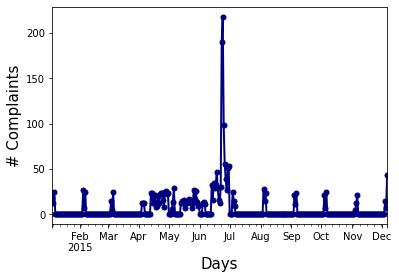

In [25]:
#ctcc_df.groupby(pd.Grouper(freq="D")).size().plot()
ax = ctcc_df.groupby(pd.Grouper(freq="D")).size().plot(lw=2, colormap='jet', marker='.', markersize=10, title='')
ax.set_xlabel("Days", fontsize= 15)
ax.set_ylabel("# Complaints",fontsize= 15)

matplotlib.rc('xtick', labelsize=7) 
matplotlib.rc('ytick', labelsize=7)


### On June 24 th of 2015, there were maximum complaints of 218.

In [26]:
ctcc_df.groupby(pd.Grouper(freq="M")).size()

date_index
2015-01-31      55
2015-02-28      59
2015-03-31      45
2015-04-30     375
2015-05-31     317
2015-06-30    1046
2015-07-31      49
2015-08-31      67
2015-09-30      55
2015-10-31      53
2015-11-30      38
2015-12-31      65
Freq: M, dtype: int64

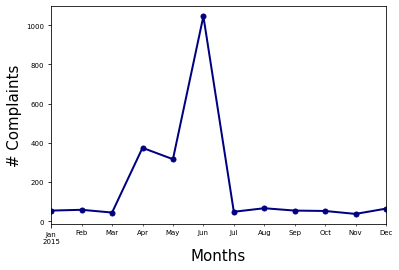

In [27]:
#ctcc_df.groupby(pd.Grouper(freq="M")).size().plot()
ax = ctcc_df.groupby(pd.Grouper(freq="M")).size().plot(lw=2, colormap='jet', marker='.', markersize=10, title='')
ax.set_xlabel("Months", fontsize = 15)
ax.set_ylabel("# Complaints", fontsize = 15)
matplotlib.rc('xtick', labelsize=15) 
matplotlib.rc('ytick', labelsize=15)

## The maximum complaints were recieved in the month of June in 2015.

In [28]:
# How many rows are there in the dataset
ctcc_df['Date'].count()

2224

In [29]:
# How many entries are there for each date?
ctcc_df['Date'].value_counts()

2015-06-24    218
2015-06-23    190
2015-06-25     98
2015-06-26     55
2015-06-30     53
             ... 
2015-05-10      7
2015-05-24      7
2015-04-05      6
2015-04-11      5
2015-05-03      5
Name: Date, Length: 91, dtype: int64

## Q3- Create a new categorical variable with value as Open and Closed. Open & Pending is to be categorized as Open and Closed & Solved is to be categorized as Closed.

In [30]:
ctcc_df.Status.unique()

array(['Closed', 'Open', 'Solved', 'Pending'], dtype=object)

In [31]:
ctcc_df['Open_Closed'] = ctcc_df['Status'].apply(lambda x:'Open' if (x== 'Open' or x == 'Pending') else 'Closed')

In [32]:
ctcc_df.head()

,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,month,date_index,Open_Closed
date_index,,,,,,,,,,,,,
2015-04-22 15:53:50,Comcast Cable Internet Speeds,2015-04-22,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,4,2015-04-22 15:53:50,Closed
2015-08-04 10:22:56,Payment disappear - service got disconnected,2015-04-08,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,4,2015-08-04 10:22:56,Closed
2015-04-18 09:55:47,Speed and Service,2015-04-18,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,4,2015-04-18 09:55:47,Closed
2015-07-05 11:59:35,Comcast Imposed a New Usage Cap of 300GB that ...,2015-05-07,2015-07-05,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,5,2015-07-05 11:59:35,Open
2015-05-26 13:25:26,Comcast not working and no service to boot,2015-05-26,2015-05-26,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,5,2015-05-26 13:25:26,Closed


## Q4: Provide state wise status of complaints in a stacked bar chart. Use the categorized variable from Q3. Provide insights on:

## Which state has the maximum complaints
## Which state has the highest percentage of unresolved complaints

In [33]:
#ctcc_df['Customer Complaint'].groupby(ctcc_df.month).count().plot(kind='bar',figsize=(22,6))
ctcc_df.groupby(['State', 'Open_Closed'])['Open_Closed'].count()

State          Open_Closed
Alabama        Closed         17
               Open            9
Arizona        Closed         14
               Open            6
Arkansas       Closed          6
                              ..
Virginia       Open           11
Washington     Closed         75
               Open           23
West Virginia  Closed          8
               Open            3
Name: Open_Closed, Length: 77, dtype: int64

In [34]:
statewise_ctccdf=ctcc_df[['Date', 'State']].groupby('State').count().sort_values(by='Date',ascending=False)
statewise_ctccdf.head()

,Date
State,
Georgia,288
Florida,240
California,220
Illinois,164
Tennessee,143


### Georgia state has the maxium number of compliants

In [35]:
Statewise_solving_rate=ctcc_df.groupby(['State','Open_Closed'])['Open_Closed'].count().unstack().fillna(0)
Statewise_solving_rate=pd.DataFrame(Statewise_solving_rate)
Statewise_solving_rate.head(2)


Open_Closed,Closed,Open
State,,
Alabama,17.0,9.0
Arizona,14.0,6.0


In [36]:
Statewise_solving_rate['unresolved complaint percent']=(Statewise_solving_rate['Open']/Statewise_solving_rate['Closed']*100)
Statewise_solving_rate.head(5)

Open_Closed,Closed,Open,unresolved complaint percent
State,,,
Alabama,17.0,9.0,52.941176
Arizona,14.0,6.0,42.857143
Arkansas,6.0,0.0,0.000000
California,159.0,61.0,38.364780
Colorado,58.0,22.0,37.931034


Text(0, 0.5, 'States')

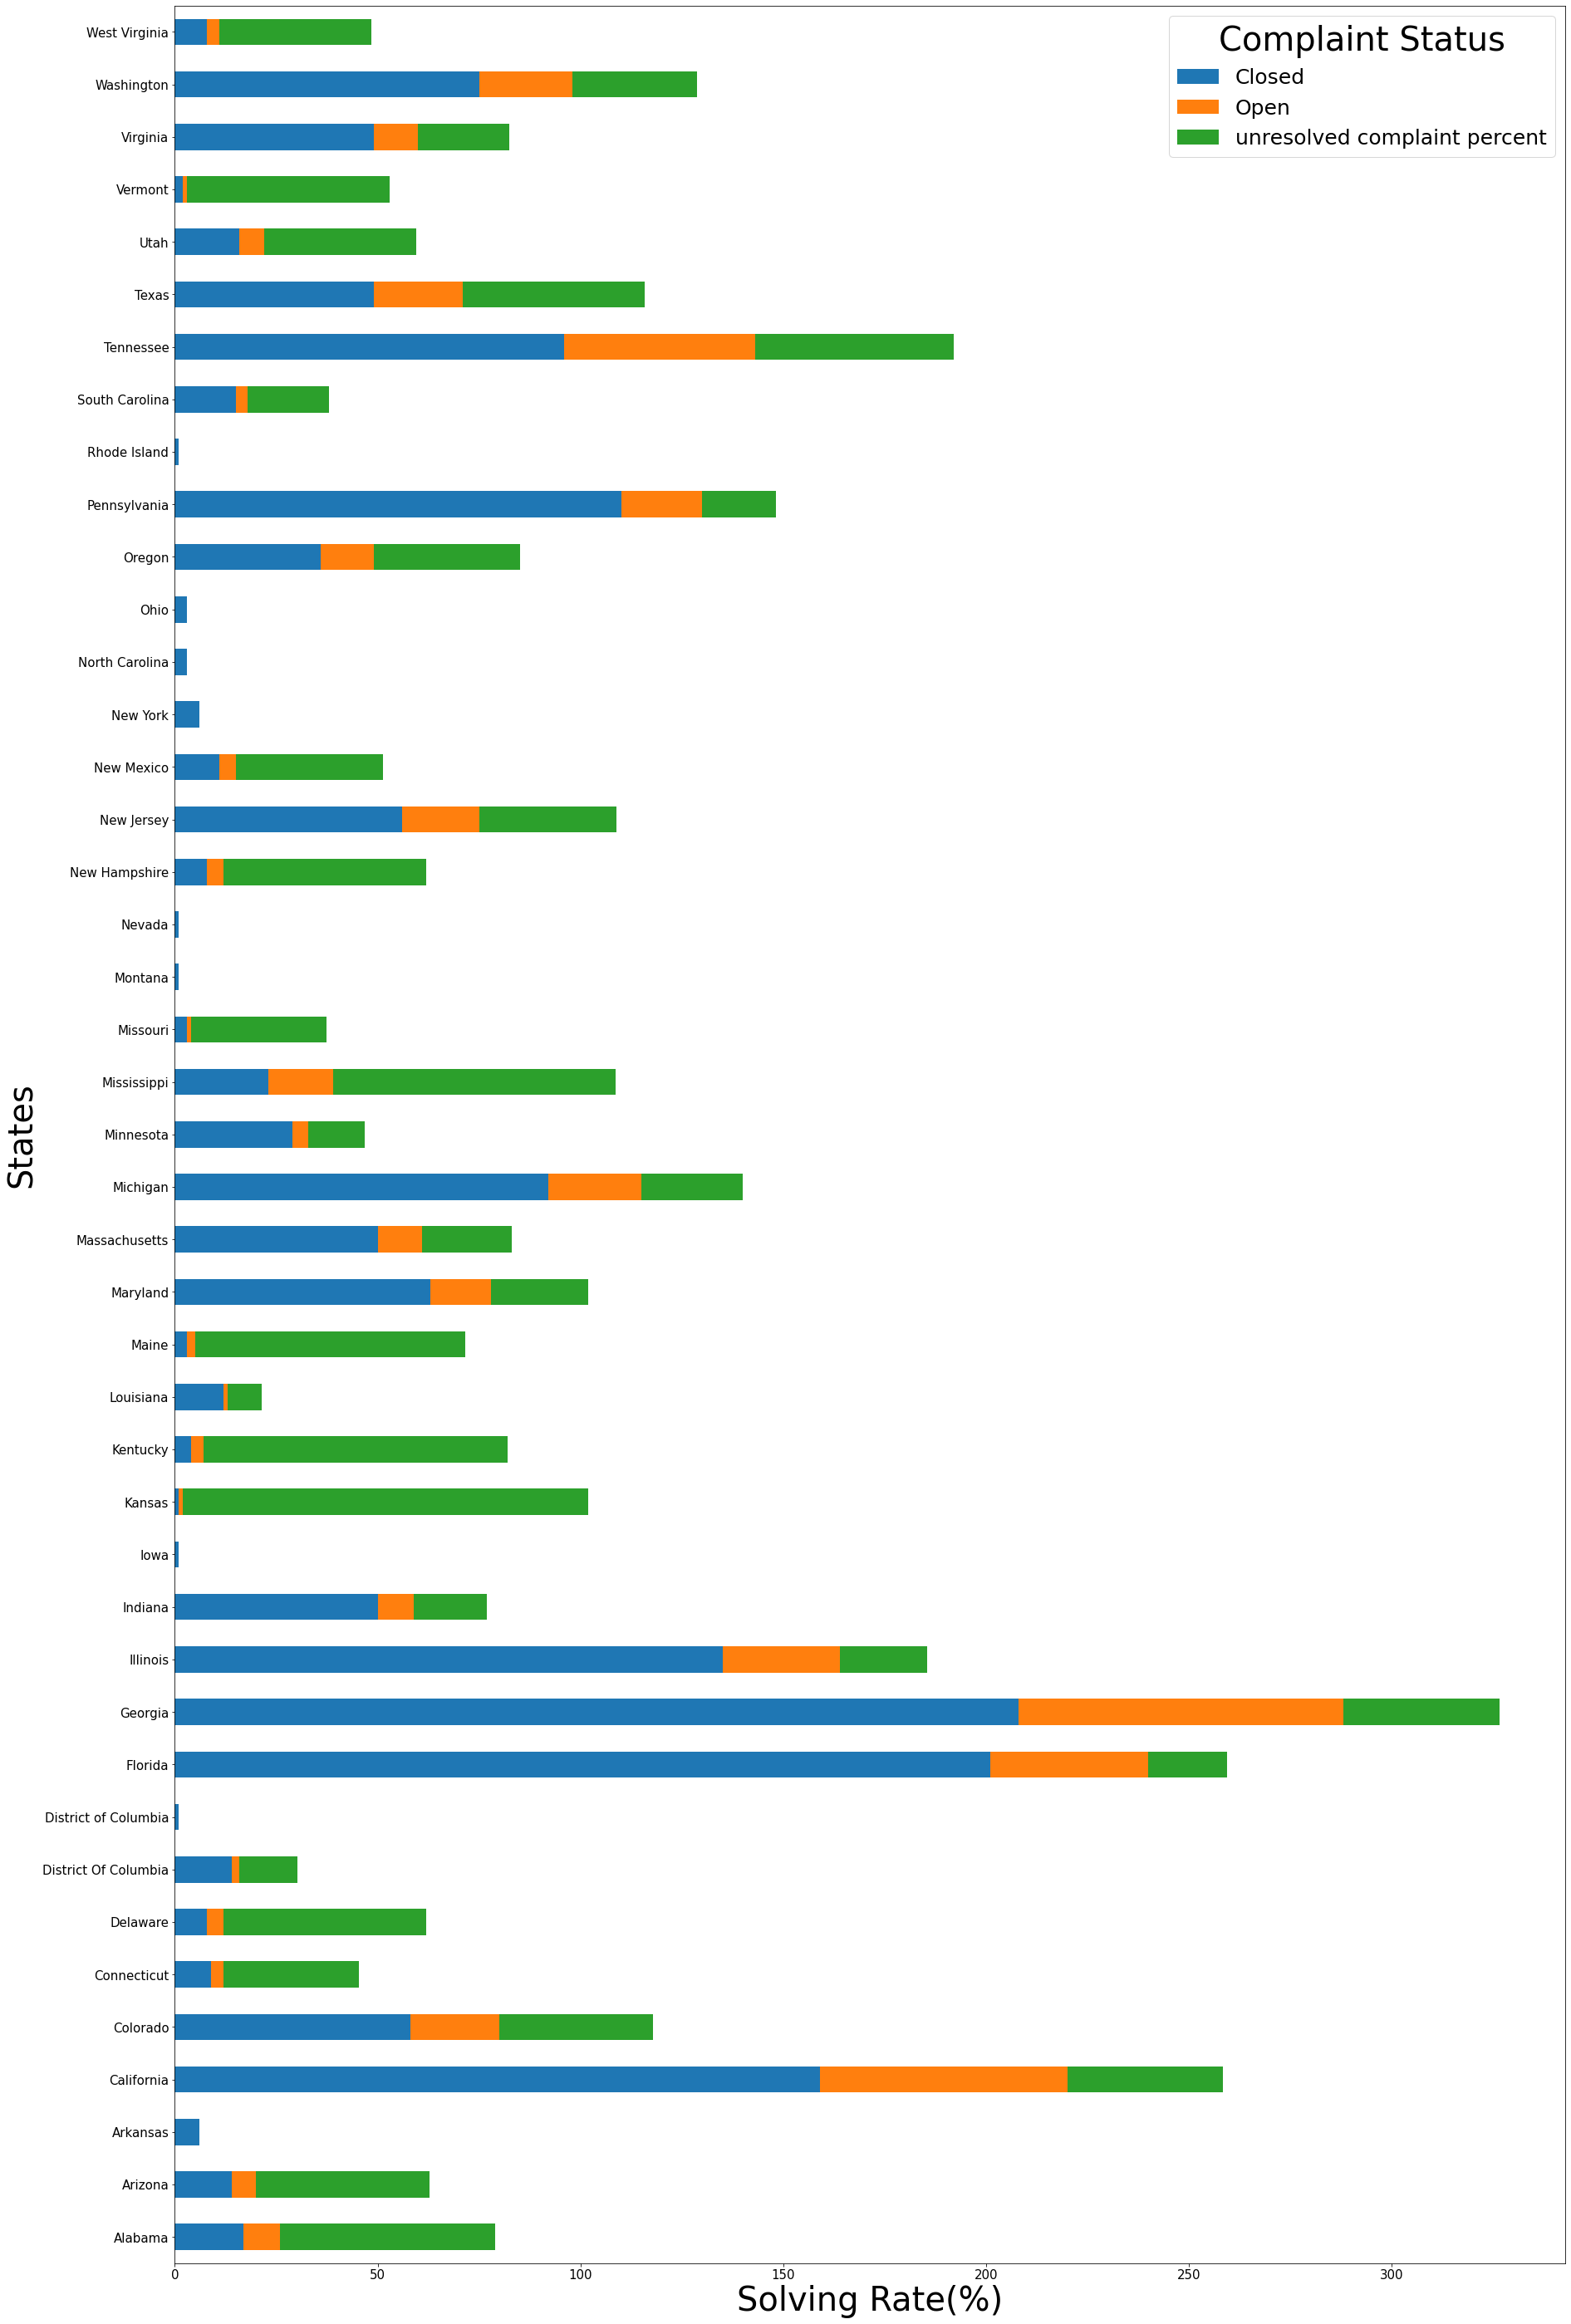

In [37]:
#Statewise_solving_rate.plot(kind='bar',stacked=True,figsize=(15,4))
ax1 = Statewise_solving_rate.plot(kind='barh',stacked=True,figsize=(30,50))
matplotlib.rc('xtick', labelsize=30) 
matplotlib.rc('ytick', labelsize=30)
plt.legend(title = "Complaint Status", fontsize=25, title_fontsize= 40) # using a size in points plt.legend()

ax1.set_xlabel("Solving Rate(%)", fontsize= 40)
ax1.set_ylabel("States",fontsize= 40)

### Kansas with 1 out of 1 complaint not solved has 100% unresolved complaint, followed by Kentucky with 75% unresolved complaints.

Status_complaints.plot(kind="barh", figsize=(30,50), stacked=True)
Statewise_solving_rate.plot(kind='barh',stacked=True,figsize=(15,4))

## Q5: Provide the percentage of complaints resolved till date, which were received through the Internet and customer care calls.

In [38]:
Resolved_by_Recieved = ctcc_df.groupby(['Received Via','Open_Closed'])['Received Via'].count().unstack()
Resolved_by_Recieved

Open_Closed,Closed,Open
Received Via,,
Customer Care Call,864,255
Internet,843,262


In [39]:
compl = ctcc_df['Open_Closed'].value_counts()
compl

Closed    1707
Open       517
Name: Open_Closed, dtype: int64

In [40]:
totalcomplaint=len(ctcc_df)
totalcomplaint

2224

In [41]:
Resolved_by_Recieved.loc['Grand  colTotal', :] = Resolved_by_Recieved.sum()

In [42]:
Resolved_by_Recieved

Open_Closed,Closed,Open
Received Via,,
Customer Care Call,864.0,255.0
Internet,843.0,262.0
Grand colTotal,1707.0,517.0


In [43]:
Resolved_by_Recieved['Grand rowTotal'] = Resolved_by_Recieved.sum(axis=1)

In [44]:
Resolved_by_Recieved

Open_Closed,Closed,Open,Grand rowTotal
Received Via,,,
Customer Care Call,864.0,255.0,1119.0
Internet,843.0,262.0,1105.0
Grand colTotal,1707.0,517.0,2224.0


In [45]:
Resolved_by_Recieved['Percent_Resolved'] = 100* Resolved_by_Recieved['Closed']/Resolved_by_Recieved['Grand rowTotal']
Resolved_by_Recieved

Open_Closed,Closed,Open,Grand rowTotal,Percent_Resolved
Received Via,,,,
Customer Care Call,864.0,255.0,1119.0,77.211796
Internet,843.0,262.0,1105.0,76.289593
Grand colTotal,1707.0,517.0,2224.0,76.753597


### The percentage of complaints resolved till date, received through the Internet and customer care calls, are 76.29 and 77.21, and the overlall percentage of complaints resolved across these two groups are 76.75.

## Q2: Provide a table with the frequency of complaint types.

## Which complaint types are maximum i.e., around internet, network issues, or across any other domains.

In [46]:
# nlp in python - nltk
import nltk
# download the stopwords
nltk.download('stopwords')
# import the stopwords
nltk.download('wordnet')
from nltk.corpus import stopwords
# import the lemmatizer
from nltk.stem.wordnet import WordNetLemmatizer
import string

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Byju\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Byju\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


In [47]:
stop = set(stopwords.words('english'))
exclude = set(string.punctuation)
lemma = WordNetLemmatizer()

# stemming - removal of suffixes

from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

def clean_text(text):
    stop_free = " ".join([i for i in text.lower().split() if i not in stop])
    punc_free = "".join([ch for ch in stop_free if ch not in exclude])
    normalised = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    word_stem = " ".join([ps.stem(i) for i in normalised.split()])
    #" ".join([st.stem(i) for i in sentence.split()])
    #return normalised
    return word_stem
   


In [48]:
text_complete = ctcc_df["Customer Complaint"].tolist()
text_clean = [clean_text(text).split() for text in text_complete]
#text_clean

In [49]:
type(text_clean)

list

In [50]:
text_clean[:5]

[['comcast', 'cabl', 'internet', 'speed'],
 ['payment', 'disappear', 'servic', 'got', 'disconnect'],
 ['speed', 'servic'],
 ['comcast', 'impos', 'new', 'usag', 'cap', '300gb', 'punish', 'stream'],
 ['comcast', 'work', 'servic', 'boot']]

In [51]:
#length of the list
len(text_clean)
#last five elements of the list 
text_clean[-5:] 

[['servic', 'avail'],
 ['comcast', 'monthli', 'bill', 'return', 'modem'],
 ['complaint', 'comcast'],
 ['extrem', 'unsatisfi', 'comcast', 'custom'],
 ['comcast', 'ypsilanti', 'mi', 'internet', 'speed']]

In [52]:
from collections import Counter

words = text_clean
counter = Counter(words[0])
for i in words[1:]: 
    counter.update(i)

#counter.most_common()
counter.most_common(10)

[('comcast', 1200),
 ('internet', 517),
 ('servic', 496),
 ('bill', 361),
 ('data', 219),
 ('speed', 187),
 ('cap', 185),
 ('charg', 146),
 ('issu', 121),
 ('price', 99)]

## The complaint types are maximum around internet, followed by network issues.

In [53]:
## Ignore the below code. Attempts to find solution using countvectorizer method did not succeed. Need help to understand the issue.

In [54]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer # # convert a collection of documents into tokens
# convert the text into a bag of words object so that we can enumerate the features

import re
re.compile('<title>(.*)</title>')

#Function to preprocess the text so that the numbers are removed form the list
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    return text



CountVec = CountVectorizer(preprocessor=preprocess_text, ngram_range=(1,2), stop_words='english') 
#CountVec = CountVectorizer(ngram_range=(1,1), stop_words='english') 
# For example an ngram_range of (1, 1) means only unigrams, (1, 2) means unigrams and bigrams, and (2, 2) means only bigrams
#transform
Count_data = CountVec.fit_transform(ctcc_df["Customer Complaint"])


Count_data
#create dataframe
cv_dataframe=pd.DataFrame(Count_data.toarray(),columns=CountVec.get_feature_names())
#print(cv_dataframe)


#bag_of_words_transform =CountVectorizer(ngram_range=(1,1),analyzer=clean_text)
#ctcc_bow=bag_of_words_transform.fit_transform(ctcc_df["Customer Complaint"])

In [55]:
# get the feature names
veclist=CountVec.get_feature_names()
veclist[:50]

['able',
 'able access',
 'able use',
 'abuse',
 'abuses',
 'abysmal',
 'abysmal customer',
 'acceptable',
 'acceptable internet',
 'access',
 'access data',
 'access email',
 'access hbo',
 'access internet',
 'access issues',
 'access onlinebilling',
 'access playstation',
 'access recently',
 'access right',
 'access service',
 'access sony',
 'access speeds',
 'accidentally',
 'accidentally comcast',
 'according',
 'according initial',
 'account',
 'account closed',
 'account comcast',
 'account info',
 'account information',
 'account issues',
 'account party',
 'account pay',
 'account plan',
 'account reason',
 'account removed',
 'account supposed',
 'accounts',
 'accourt',
 'accurate',
 'accurate information',
 'accusing',
 'accusing people',
 'acess',
 'activation',
 'activation kit',
 'actually',
 'actually used',
 'ad']

In [56]:
from collections import Counter
word_counts = Counter(veclist)
top_four = word_counts.most_common(1)
print(top_four)



[('able', 1)]


In [57]:
ctcc_df.shape

(2224, 13)